In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install -q kaggle
!cp /content/drive/MyDrive/colab/kaggle.json /content/kaggle.json
!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [6]:
train_df = pd.read_csv('/content/train.csv')
train_df

,id,b1,b11,b12,b2,b3,b4,b5,b6,b7,b8,b8_a,b9,nforest_type
0,2002,293,1927,1038,278,475,453,987,1773,2184,1900,2343,3039,MDF
1,3212,197,1598,697,201,347,228,682,1982,2449,2254,2685,2690,DDF
2,13312,929,1975,1031,982,1020,856,1220,2051,2421,2392,2671,2683,MDF
3,17020,132,1560,689,189,408,175,609,2117,2907,3024,3005,2955,MDF
4,5967,241,1944,1131,362,538,487,918,1549,1844,1702,2077,2043,MDF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13048,9185,374,1940,1054,382,565,498,977,1678,1929,2109,2291,2100,DDF
13049,13977,1983,3602,2720,1622,1782,1766,2314,3488,3900,3924,4097,6053,DDF
13050,755,940,2007,1148,975,1080,968,1252,1780,1983,1942,2247,2170,DDF
13051,1616,1174,2312,1190,1112,1126,889,1310,2511,3085,3050,3396,3380,MDF


In [7]:
b1 = train_df['b1']
b11 = train_df['b11']
b12 = train_df['b12']
b2 = train_df['b2']
b3 = train_df['b3']
b4 = train_df['b4']
b5 = train_df['b5']
b6 = train_df['b6']
b7 = train_df['b7']
b8 = train_df['b8']
b8a = train_df['b8_a']
b9 = train_df['b9']

In [8]:
train_df['NDVI'] = (train_df['b8'] - train_df['b4']) / (train_df['b8'] + train_df['b4'])
train_df['EVI'] = 2.5 * ((train_df['b8'] - train_df['b4']) / (train_df['b8'] + 6 * train_df['b4'] - 7.5 * train_df['b2'] + 1.01))
train_df['NDWI'] = (train_df['b3'] - train_df['b8']) / (train_df['b3'] + train_df['b8'])
train_df['SAVI'] = (train_df['b8'] - train_df['b4']) * (1 + 0.5) / (train_df['b8'] + train_df['b4'] + 0.5)
train_df['MSAVI'] = (2 * train_df['b8'] + 1 - ( (2 * train_df['b8'] + 1) ** 2 - 8 * (train_df['b8'] - train_df['b4'])) ** (1 / 2)) / 2
train_df['GNDVI'] = (train_df['b8'] - train_df['b3']) / (train_df['b8'] + train_df['b3'])
train_df['RENDVI'] = (train_df['b8'] - train_df['b5']) / (train_df['b8'] + train_df['b5'])
train_df['NDMI'] = (train_df['b8'] - train_df['b11']) / (train_df['b8'] + train_df['b11'])
train_df['GRVI'] = (train_df['b3'] - train_df['b4']) / (train_df['b3'] + train_df['b4'])
train_df['TVI'] = ( (train_df['b8'] - train_df['b4']) / (train_df['b8'] + train_df['b4'] + 0.5) ) ** (1 / 2)
train_df['MCARI'] = ((train_df['b5'] - train_df['b4']) - 0.2 * (train_df['b5'] - train_df['b3'])) / (train_df['b5'] / train_df['b4'])
train_df['BSI'] =  ((train_df['b11'] + train_df['b4']) - (train_df['b8'] + train_df['b2'])) / ((train_df['b11'] + train_df['b4']) + (train_df['b8'] + train_df['b2']))
train_df['NBR'] = (train_df['b8'] - train_df['b12']) / (train_df['b8'] + train_df['b12'])
train_df['MSI'] = train_df['b11'] / train_df['b8']

In [9]:
train_df.shape

(13053, 28)

In [10]:
train_df

,id,b1,b11,b12,b2,b3,b4,b5,b6,b7,...,MSAVI,GNDVI,RENDVI,NDMI,GRVI,TVI,MCARI,BSI,NBR,MSI
0,2002,293,1927,1038,278,475,453,987,1773,2184,...,0.761531,0.600000,0.316245,-0.007055,0.023707,0.784110,198.089970,0.044318,0.293397,1.014211
1,3212,197,1598,697,201,347,228,682,1982,2449,...,0.898826,0.733180,0.535422,0.170301,0.206957,0.903390,129.378299,-0.146928,0.527618,0.708962
2,13312,929,1975,1031,982,1020,856,1220,2051,2421,...,0.642092,0.402110,0.324474,0.095489,0.087420,0.687629,227.331148,-0.087510,0.397604,0.825669
3,17020,132,1560,689,189,408,175,609,2117,2907,...,0.942121,0.762238,0.664740,0.319372,0.399657,0.943637,113.160920,-0.298707,0.628872,0.515873
4,5967,241,1944,1131,362,538,487,918,1549,1844,...,0.713806,0.519643,0.299237,-0.066374,0.049756,0.744930,188.327887,0.081646,0.201553,1.142186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13048,9185,374,1940,1054,382,565,498,977,1678,1929,...,0.763826,0.577412,0.366818,0.041739,0.063029,0.786024,202.156397,-0.010753,0.333544,0.919867
13049,13977,1983,3602,2720,1622,1782,1766,2314,3488,3900,...,0.549917,0.375394,0.258096,0.042785,0.004510,0.615815,337.020570,-0.016309,0.181216,0.917941
13050,755,940,2007,1148,975,1080,968,1252,1780,1983,...,0.501480,0.285242,0.216030,-0.016460,0.054688,0.578490,192.981470,0.009844,0.256958,1.033471
13051,1616,1174,2312,1190,1112,1126,889,1310,2511,3085,...,0.708491,0.460728,0.399083,0.137635,0.117618,0.740639,260.728092,-0.130517,0.438679,0.758033


## Visualize

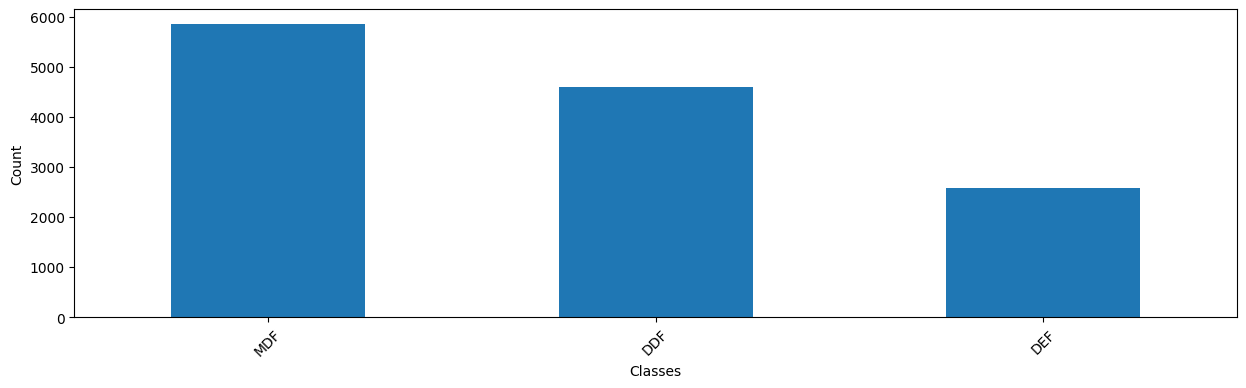

In [ ]:
class_counts = train_df['nforest_type'].value_counts()

# Plotting
plt.figure(figsize=(15, 4))
class_counts.plot(kind='bar')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

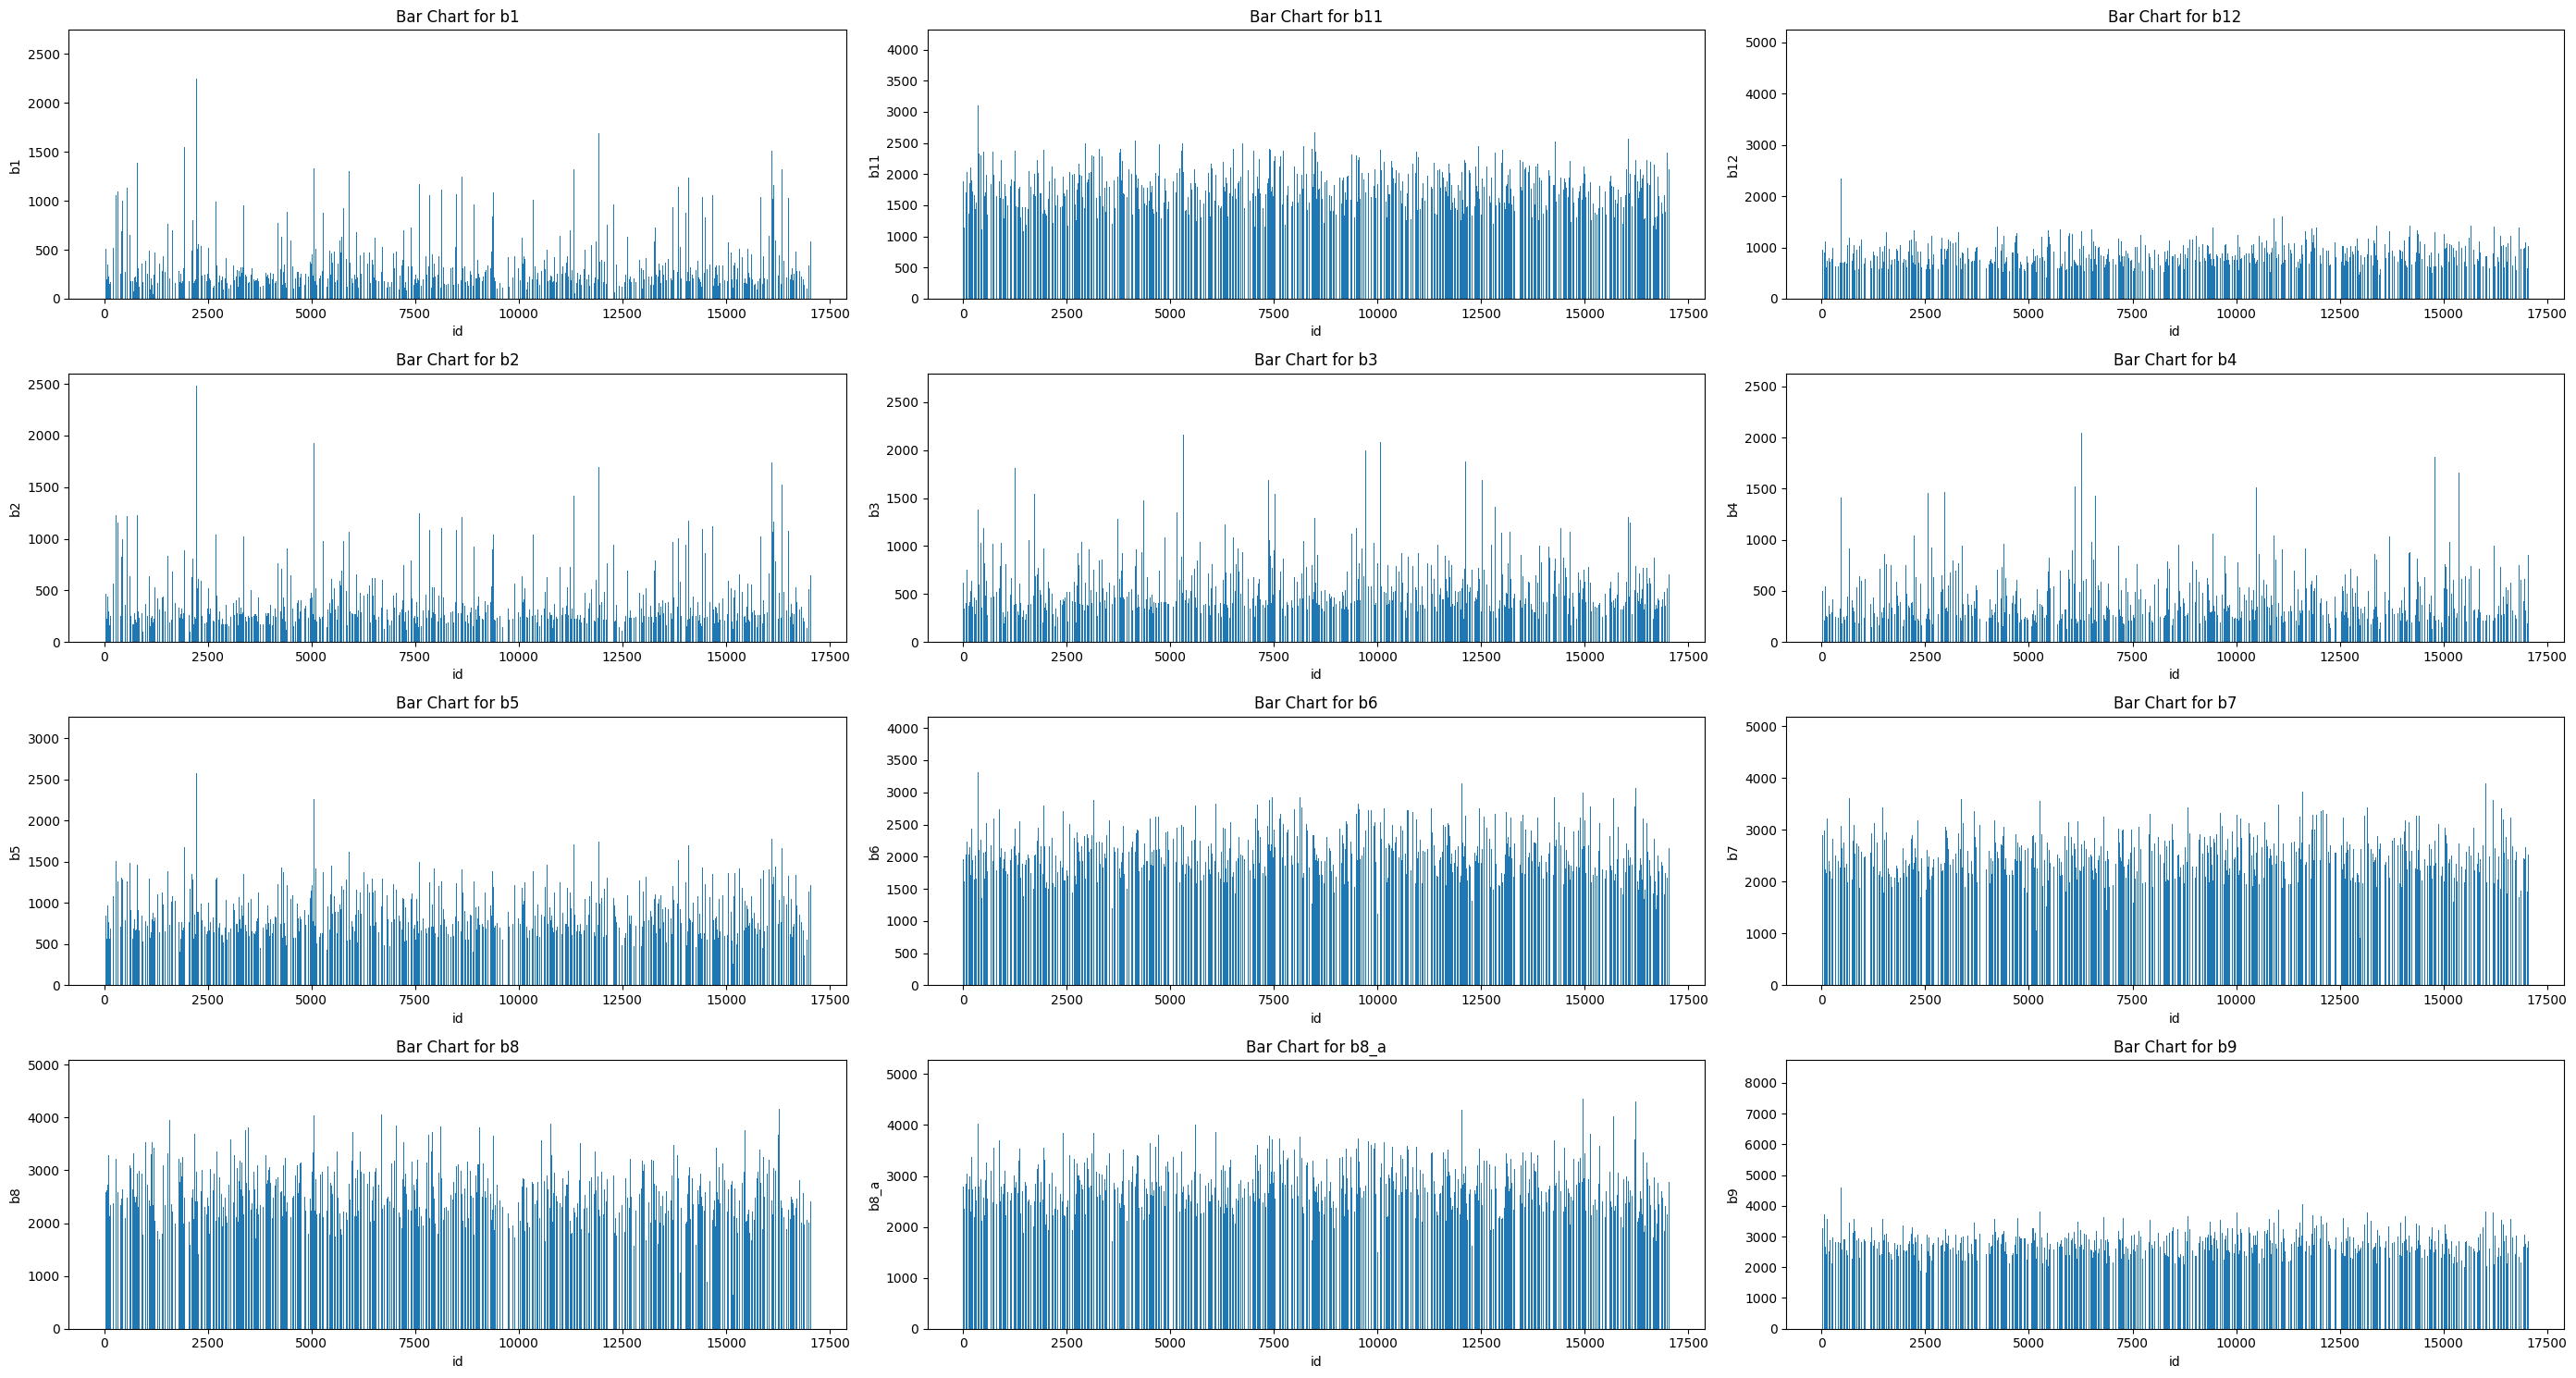

In [ ]:
num_rows = 4
num_cols = 3
num_plots = num_rows * num_cols

# Create figure and axes
fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(28, 15))

# Flatten the axes array for easier iteration
axs_flat = axs.flatten()

# Plot each feature
for i, col in enumerate(train_df.columns[1:13]):  # Assuming the first column is 'id'
    ax = axs_flat[i]
    ax.bar(train_df['id'], train_df[col])
    ax.set_xlabel('id')
    ax.set_ylabel(col)
    ax.set_title(f'Bar Chart for {col}')

# Remove any unused subplots
for i in range(len(train_df.columns) - 1, num_plots):
    fig.delaxes(axs_flat[i])

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# ML

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_df.columns.tolist()

In [11]:
feature = [
    'b1', 'b11', 'b12', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8', 'b8_a', 'b9', 'NDVI', 'EVI', 'NDWI', 'SAVI', 'MSAVI',
    'GNDVI', 'RENDVI', 'NDMI', 'GRVI', 'TVI', 'MCARI', 'BSI', 'NBR', 'MSI'
]
target = ['nforest_type']

In [12]:
X = train_df[feature]
y = train_df[target]

In [13]:
from sklearn import model_selection, preprocessing
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=21, test_size=0.08)

In [14]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(12008, 26)
(1045, 26)
(12008, 1)
(1045, 1)


In [15]:
models_results = []
model_names = []

## LogisticRegression

In [17]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score

In [ ]:
log_reg = linear_model.LogisticRegression()

In [ ]:
param_grid = [
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000, 5000, 10000 20000, 50000, 100000],
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 300, 500, 800, 900, 1000, 1100, 1200, 1500, 1800, 2500]
    }
]

In [ ]:
clf_grid = GridSearchCV(estimator=log_reg, param_grid = param_grid, cv = 3, n_jobs=-1,verbose=True, scoring='accuracy')

In [ ]:
best_clf = clf_grid.fit(X_train, y_train)

In [ ]:
best_clf.best_estimator_

LogisticRegression(C=545.5594781168514, max_iter=1000, solver='newton-cg')

In [20]:
log_reg = linear_model.LogisticRegression(C=120000, max_iter=800, solver='newton-cg')
log_model = log_reg.fit(X_train, y_train)
acc = model_selection.cross_val_score(
    log_model,
    X_test,
    y_test,
    cv=7).mean()

model_names.append("Logistic Regression")
models_results.append(acc)

y_pred = log_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed

In [19]:
print("Accuracy Count:", acc, "\n\n\n")

Accuracy Count: 0.5559220198146373 





In [21]:
print("Accuracy Count with Gridsearch:", acc, "\n\n\n")

Accuracy Count with Gridsearch: 0.6181399808245446 





In [22]:
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

        DDF       0.60      0.52      0.81      0.55      0.65      0.41       372
        DEF       0.64      0.64      0.93      0.64      0.77      0.58       171
        MDF       0.66      0.72      0.66      0.69      0.69      0.48       502

avg / total       0.63      0.64      0.75      0.63      0.69      0.47      1045



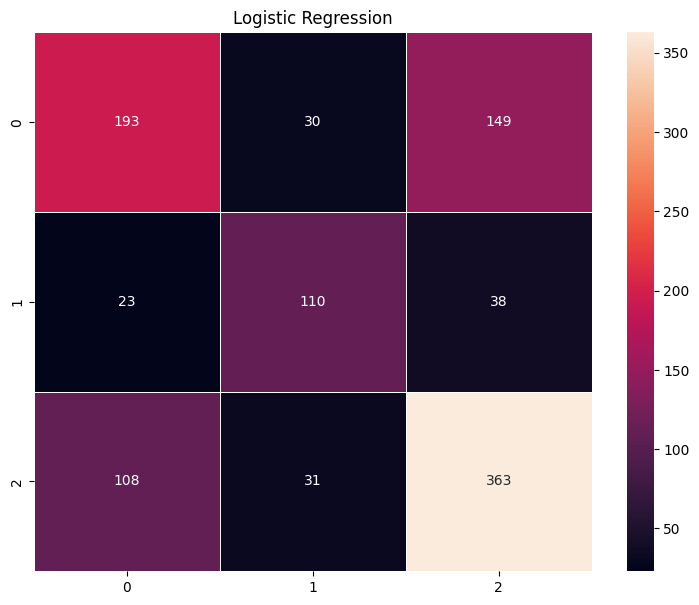

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9,7))
plt.title("Logistic Regression")
sns.heatmap(cm, annot=True, fmt="d", linewidths=0.5 ,cbar=True),
plt.show()

## Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import ensemble

In [ ]:
rfc = RandomForestClassifier(random_state=42)

In [ ]:
param_grid = {
    'n_estimators': [200, 300, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
}

In [ ]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: Fut

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 300, 500]})

In [ ]:
CV_rfc.best_params_

{'max_depth': 8, 'max_features': 'auto', 'n_estimators': 300}

In [26]:
rf = ensemble.RandomForestClassifier(max_depth= 8, max_features='auto', n_estimators= 300)
rf_model = rf.fit(X_train, y_train)
acc = model_selection.cross_val_score(
    rf_model,
    X_test,
    y_test,
    cv=7).mean()


<ipython-input-26-c17ce31ed3ef>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model = rf.fit(X_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.

In [27]:
model_names.append("Random Forest")
models_results.append(acc)

In [28]:
print("Accuracy Count:", acc, "\n\n\n")

y_pred = rf_model.predict(X_test)
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

Accuracy Count: 0.5961649089165867 



                   pre       rec       spe        f1       geo       iba       sup

        DDF       0.60      0.56      0.79      0.58      0.66      0.43       372
        DEF       0.68      0.56      0.95      0.61      0.73      0.51       171
        MDF       0.65      0.73      0.64      0.69      0.68      0.47       502

avg / total       0.64      0.64      0.75      0.64      0.68      0.46      1045



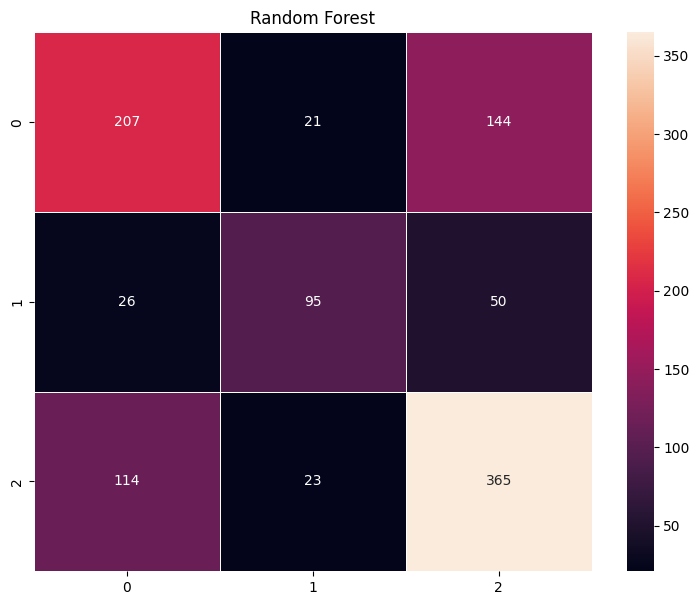

In [29]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9,7))
plt.title("Random Forest")
sns.heatmap(cm, annot=True, fmt="d", linewidths=0.5 ,cbar=True),
plt.show()

## GXB

In [ ]:
y_train_2 = y_train.copy()
y_train_2

In [ ]:
num_list = []
for i in y_train_2['nforest_type']:
  if i == "MDF":
    num_list.append(0)
  elif i == "DDF":
    num_list.append(1)
  else:
    num_list.append(2)
y_train_2['nforest_type'] = num_list
y_train_2

In [ ]:
num_list = []
for i in y_test['nforest_type']:
  if i == "MDF":
    num_list.append(0)
  elif i == "DDF":
    num_list.append(1)
  else:
    num_list.append(2)
y_test['nforest_type'] = num_list
y_test

In [33]:
from xgboost import XGBClassifier
import xgboost as xgb

In [ ]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [ ]:
xgb_model = xgb.XGBClassifier()

# parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
#               'learning_rate': [0.05, 0.1, 0.08], #so called `eta` value
#               'max_depth': [3, 4, 5],
#               'min_child_weight': [1, 5, 10],
#               'subsample': [0.6, 0.8, 1.0],
#               'n_estimators': [500, 800, 1000], #number of trees, change it to 1000 for better results
#               'seed': [42]}


clf = GridSearchCV(xgb_model, params, n_jobs=-1,
                   cv=3,
                   scoring='accuracy',
                   verbose=2, refit=True)

In [ ]:
clf.fit(X_train, y_train_2)

Fitting 3 folds for each of 405 candidates, totalling 1215 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'gamma': [0.5, 1, 1.5, 2, 5], 'max_depth': [3, 4, 5],
                         'min_child_weight': [1, 5, 10],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='accuracy', verbose=2)

In [ ]:
clf.best_params_

{'colsample_bytree': 0.8,
 'gamma': 1,
 'max_depth': 5,
 'min_child_weight': 1,
 'subsample': 0.8}

In [34]:
xgbx = xgb.XGBClassifier(
    colsample_bytree= 0.8,
    gamma= 1,
    max_depth= 5,
    min_child_weight= 1,
    subsample= 0.8)
xgb_model = xgbx.fit(X_train, y_train_2)
acc = model_selection.cross_val_score(
    xgb_model,
    X_test,
    y_test,
    cv=7).mean()


In [35]:
model_names.append("XGBoost")
models_results.append(acc)

In [ ]:
num_list = []
for i in y_test['nforest_type']:
  if i == 0:
    num_list.append("MDF")
  elif i == 1:
    num_list.append("DDF")
  else:
    num_list.append("DEF")
y_test['nforest_type'] = num_list
y_test

In [37]:
y_pred = xgb_model.predict(X_test)

In [38]:
num_list = []
for i in y_pred:
  if i == 0:
    num_list.append("MDF")
  elif i == 1:
    num_list.append("DDF")
  else:
    num_list.append("DEF")
num_list
y_pred = num_list.copy()

In [39]:
print("Accuracy Count:", acc, "\n\n\n")

from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

Accuracy Count: 0.591332694151486 



                   pre       rec       spe        f1       geo       iba       sup

        DDF       0.65      0.64      0.81      0.64      0.72      0.51       372
        DEF       0.77      0.74      0.96      0.76      0.84      0.70       171
        MDF       0.71      0.73      0.73      0.72      0.73      0.53       502

avg / total       0.70      0.70      0.79      0.70      0.74      0.55      1045



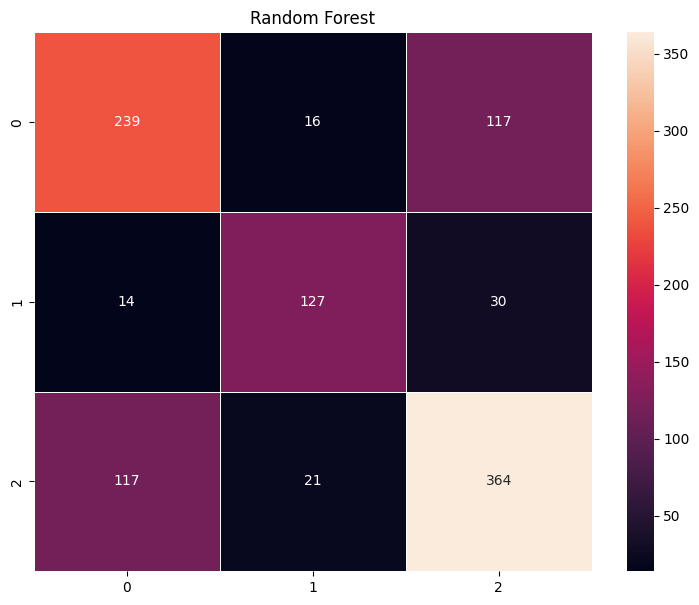

In [40]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9,7))
plt.title("Random Forest")
sns.heatmap(cm, annot=True, fmt="d", linewidths=0.5 ,cbar=True),
plt.show()

## Catboot

In [41]:
!pip install -q catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 6.0 MB/s eta 0:00:00


In [42]:
from catboost import CatBoostClassifier
from sklearn.metrics import make_scorer, accuracy_score

In [ ]:
clf = CatBoostClassifier()

params = {
    'iterations': [200, 300, 400],
    'learning_rate': [0.08, 0.1, 0.05],
    'depth': [9, 11, 13]
         }
scorer = make_scorer(accuracy_score)

In [ ]:
clf_grid = GridSearchCV(estimator=clf, param_grid=params, cv=3, verbose=True, n_jobs=-1,scoring=scorer, error_score="raise")

In [ ]:
clf_grid.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


0:	learn: 1.0676707	total: 32.6ms	remaining: 13s
1:	learn: 1.0372130	total: 57.8ms	remaining: 11.5s
2:	learn: 1.0123146	total: 81.9ms	remaining: 10.8s
3:	learn: 0.9912234	total: 112ms	remaining: 11s
4:	learn: 0.9735472	total: 136ms	remaining: 10.7s
5:	learn: 0.9559495	total: 157ms	remaining: 10.3s
6:	learn: 0.9415254	total: 187ms	remaining: 10.5s
7:	learn: 0.9285912	total: 213ms	remaining: 10.5s
8:	learn: 0.9168733	total: 242ms	remaining: 10.5s
9:	learn: 0.9051791	total: 270ms	remaining: 10.5s
10:	learn: 0.8958302	total: 295ms	remaining: 10.4s
11:	learn: 0.8858715	total: 319ms	remaining: 10.3s
12:	learn: 0.8767342	total: 343ms	remaining: 10.2s
13:	learn: 0.8691609	total: 369ms	remaining: 10.2s
14:	learn: 0.8625544	total: 395ms	remaining: 10.1s
15:	learn: 0.8560949	total: 421ms	remaining: 10.1s
16:	learn: 0.8501701	total: 449ms	remaining: 10.1s
17:	learn: 0.8443106	total: 481ms	remaining: 10.2s
18:	learn: 0.8387313	total: 506ms	remaining: 10.1s
19:	learn: 0.8343177	total: 531ms	remainin

GridSearchCV(cv=3, error_score='raise',
             estimator=<catboost.core.CatBoostClassifier object at 0x7dbcaa27d000>,
             n_jobs=-1,
             param_grid={'depth': [9, 11, 13], 'iterations': [200, 300, 400],
                         'learning_rate': [0.08, 0.1, 0.05]},
             scoring=make_scorer(accuracy_score), verbose=True)

In [ ]:
best_param = clf_grid.best_params_
best_param

{'depth': 9, 'iterations': 400, 'learning_rate': 0.1}

In [ ]:
clf = CatBoostClassifier(iterations=400,
                           learning_rate=0.1,
                           depth=9,
                           eval_metric='Accuracy')
clf_model = clf.fit(X_train, y_train)
acc = model_selection.cross_val_score(
    clf_model,
    X_test,
    y_test,
    cv=7).mean()
# print("Accuracy Count:", acc, "\n\n\n")

In [45]:
model_names.append("Catboots")
models_results.append(acc)
print("Accuracy Count:", acc, "\n\n\n")

Accuracy Count: 0.5952189197826782 





In [48]:
y_pred = clf_model.predict(data=X_test)
y_pred

array([['DEF'],
       ['DDF'],
       ['DDF'],
       ...,
       ['DDF'],
       ['DDF'],
       ['DEF']], dtype=object)

In [49]:
y_pred = [item for sublist in y_pred for item in sublist]

print(y_pred)

['DEF', 'DDF', 'DDF', 'MDF', 'DDF', 'DEF', 'MDF', 'DDF', 'MDF', 'DEF', 'MDF', 'MDF', 'MDF', 'DDF', 'MDF', 'MDF', 'DDF', 'DEF', 'DDF', 'DDF', 'MDF', 'DDF', 'MDF', 'MDF', 'DEF', 'MDF', 'MDF', 'DDF', 'MDF', 'DEF', 'MDF', 'DDF', 'DDF', 'DEF', 'DDF', 'DDF', 'MDF', 'DDF', 'DEF', 'DDF', 'MDF', 'DDF', 'DEF', 'MDF', 'DDF', 'MDF', 'DEF', 'DDF', 'DEF', 'MDF', 'MDF', 'MDF', 'DDF', 'MDF', 'DEF', 'MDF', 'MDF', 'DEF', 'DEF', 'MDF', 'DDF', 'DDF', 'MDF', 'MDF', 'MDF', 'MDF', 'DEF', 'MDF', 'MDF', 'DDF', 'DDF', 'MDF', 'DDF', 'MDF', 'DDF', 'DDF', 'MDF', 'DEF', 'MDF', 'MDF', 'DDF', 'DDF', 'DDF', 'DDF', 'MDF', 'DEF', 'MDF', 'DDF', 'DEF', 'DDF', 'DDF', 'MDF', 'MDF', 'DDF', 'MDF', 'MDF', 'DDF', 'DDF', 'MDF', 'DDF', 'DDF', 'MDF', 'DEF', 'MDF', 'MDF', 'DDF', 'MDF', 'DEF', 'MDF', 'DEF', 'DEF', 'MDF', 'DDF', 'DDF', 'DDF', 'MDF', 'DEF', 'DEF', 'DDF', 'DEF', 'DDF', 'DEF', 'DEF', 'MDF', 'MDF', 'DDF', 'DDF', 'MDF', 'MDF', 'DDF', 'MDF', 'MDF', 'DEF', 'MDF', 'MDF', 'MDF', 'MDF', 'MDF', 'MDF', 'DDF', 'MDF', 'MDF', 'DDF'

In [50]:
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

        DDF       0.63      0.66      0.79      0.64      0.72      0.51       372
        DEF       0.77      0.74      0.96      0.75      0.84      0.69       171
        MDF       0.71      0.70      0.73      0.70      0.71      0.51       502

avg / total       0.69      0.69      0.79      0.69      0.74      0.54      1045



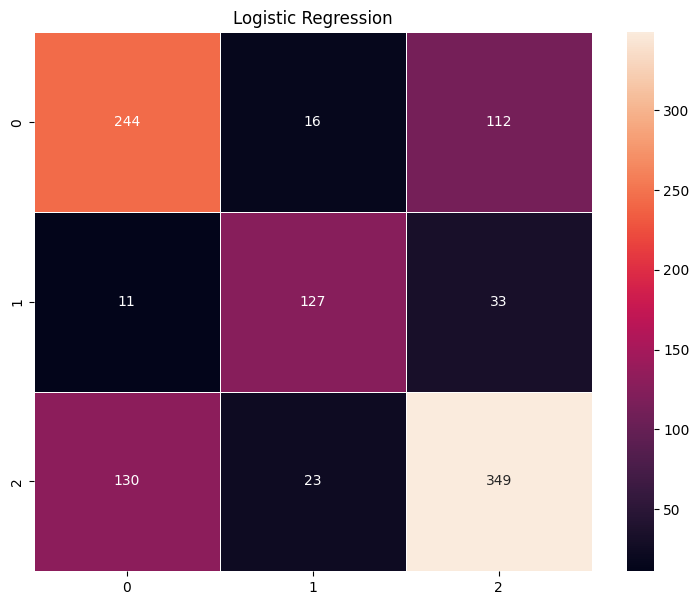

In [51]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9,7))
plt.title("Logistic Regression")
sns.heatmap(cm, annot=True, fmt="d", linewidths=0.5 ,cbar=True),
plt.show()

## LGBM

In [52]:
import lightgbm as lgb

In [ ]:
lgbm_r = lgb.LGBMClassifier()
lgbm_model = lgbm_r.fit(X_train, y_train)
acc = model_selection.cross_val_score(
    log_model,
    X_test,
    y_test,
    cv=7).mean()

In [54]:
model_names.append("LightGBM")
models_results.append(acc)
print("Accuracy Count:", acc, "\n\n\n")

Accuracy Count: 0.6181399808245446 





In [55]:
y_pred = lgbm_model.predict(X_test)
y_pred

array(['DEF', 'DDF', 'DDF', ..., 'DDF', 'DDF', 'MDF'], dtype=object)

In [56]:
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

        DDF       0.64      0.63      0.80      0.63      0.71      0.50       372
        DEF       0.78      0.75      0.96      0.76      0.85      0.70       171
        MDF       0.71      0.72      0.72      0.71      0.72      0.52       502

avg / total       0.69      0.69      0.79      0.69      0.74      0.54      1045



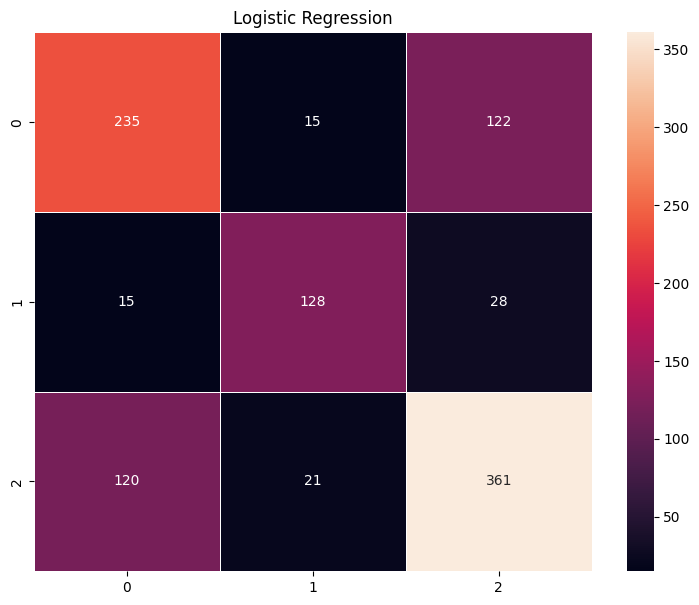

In [57]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9,7))
plt.title("Logistic Regression")
sns.heatmap(cm, annot=True, fmt="d", linewidths=0.5 ,cbar=True),
plt.show()

## สรุป

In [58]:
models_df = pd.DataFrame(columns=["Models", "Accuracy"])
models_df["Models"] = model_names
models_df["Accuracy"] = [x*100 for x in models_results]
models_df.head(10)

,Models,Accuracy
0,Logistic Regression,55.592202
1,Logistic Regression,61.813998
2,Random Forest,59.616491
3,XGBoost,59.133269
4,Catboots,59.521892
5,LightGBM,61.813998


# Test

In [59]:
df_test = pd.read_csv('/content/test.csv')
df_test

,id,b1,b11,b12,b2,b3,b4,b5,b6,b7,b8,b8_a,b9
0,13467,69,1425,693,312,524,376,847,1821,2356,2378,2611,2595
1,12719,242,1514,691,343,522,324,718,1730,2178,2472,2359,2582
2,1054,218,2354,1118,292,596,410,965,2586,3226,3371,3645,3149
3,13747,350,2013,1134,306,572,475,982,1754,1935,2275,2290,2345
4,9453,185,1450,712,293,440,384,673,1487,1965,2213,2200,2193
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,115,447,1686,811,425,661,441,958,2432,2891,2966,3126,3312
3996,10654,252,2694,1503,470,778,753,1294,2334,2656,2679,3212,2856
3997,5718,233,1486,618,249,409,260,699,2188,2831,3030,3086,3087
3998,13054,221,1840,774,245,441,231,703,2491,3453,3284,3762,3161


In [60]:
df_test['NDVI'] = (df_test['b8'] - df_test['b4']) / (df_test['b8'] + df_test['b4'])
df_test['EVI'] = 2.5 * ((df_test['b8'] - df_test['b4']) / (df_test['b8'] + 6 * df_test['b4'] - 7.5 * df_test['b2'] + 1.01))
df_test['NDWI'] = (df_test['b3'] - df_test['b8']) / (df_test['b3'] + df_test['b8'])
df_test['SAVI'] = (df_test['b8'] - df_test['b4']) * (1 + 0.5) / (df_test['b8'] + df_test['b4'] + 0.5)
df_test['MSAVI'] = (2 * df_test['b8'] + 1 - ( (2 * df_test['b8'] + 1) ** 2 - 8 * (df_test['b8'] - df_test['b4'])) ** (1 / 2)) / 2
df_test['GNDVI'] = (df_test['b8'] - df_test['b3']) / (df_test['b8'] + df_test['b3'])
df_test['RENDVI'] = (df_test['b8'] - df_test['b5']) / (df_test['b8'] + df_test['b5'])
df_test['NDMI'] = (df_test['b8'] - df_test['b11']) / (df_test['b8'] + df_test['b11'])
df_test['GRVI'] = (df_test['b3'] - df_test['b4']) / (df_test['b3'] + df_test['b4'])
df_test['TVI'] = ( (df_test['b8'] - df_test['b4']) / (df_test['b8'] + df_test['b4'] + 0.5) ) ** (1 / 2)
df_test['MCARI'] = ((df_test['b5'] - df_test['b4']) - 0.2 * (df_test['b5'] - df_test['b3'])) / (df_test['b5'] / df_test['b4'])
df_test['BSI'] =  ((df_test['b11'] + df_test['b4']) - (df_test['b8'] + df_test['b2'])) / ((df_test['b11'] + df_test['b4']) + (df_test['b8'] + df_test['b2']))
df_test['NBR'] = (df_test['b8'] - df_test['b12']) / (df_test['b8'] + df_test['b12'])
df_test['MSI'] = df_test['b11'] / df_test['b8']

In [61]:
feature = [
    'b1', 'b11', 'b12', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8', 'b8_a', 'b9', 'NDVI', 'EVI', 'NDWI', 'SAVI', 'MSAVI',
    'GNDVI', 'RENDVI', 'NDMI', 'GRVI', 'TVI', 'MCARI', 'BSI', 'NBR', 'MSI'
]
df_test_feature = df_test[feature]
df_test_feature

,b1,b11,b12,b2,b3,b4,b5,b6,b7,b8,...,MSAVI,GNDVI,RENDVI,NDMI,GRVI,TVI,MCARI,BSI,NBR,MSI
0,69,1425,693,312,524,376,847,1821,2356,2378,...,0.841856,0.638870,0.474729,0.250592,0.164444,0.852532,180.408973,-0.197951,0.548681,0.599243
1,242,1514,691,343,522,324,718,1730,2178,2472,...,0.868909,0.651303,0.549843,0.240341,0.234043,0.876415,160.104735,-0.209972,0.563073,0.612460
2,218,2354,1118,292,596,410,965,2586,3226,3371,...,0.878359,0.699521,0.554889,0.177642,0.184891,0.884886,204.447668,-0.139879,0.501894,0.698309
3,350,2013,1134,306,572,475,982,1754,1935,2275,...,0.791172,0.598174,0.396991,0.061101,0.092646,0.808966,205.575356,-0.018347,0.334702,0.884835
4,185,1450,712,293,440,384,673,1487,1965,2213,...,0.826447,0.668300,0.533611,0.208299,0.067961,0.839130,138.308470,-0.154839,0.513162,0.655219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,447,1686,811,425,661,441,958,2432,2891,2966,...,0.851294,0.635511,0.511723,0.275150,0.199637,0.860821,210.648852,-0.229069,0.570559,0.568442
3996,252,2694,1503,470,778,753,1294,2334,2656,2679,...,0.718887,0.549899,0.348603,-0.002792,0.016329,0.749071,254.763060,0.045179,0.281205,1.005599
3997,233,1486,618,249,409,260,699,2188,2831,3030,...,0.914178,0.762140,0.625101,0.341895,0.222720,0.917506,141.716738,-0.305075,0.661184,0.490429
3998,221,1840,774,245,441,231,703,2491,3453,3284,...,0.929649,0.763221,0.647354,0.281811,0.312500,0.931901,137.877098,-0.260357,0.618531,0.560292


In [62]:
test_log = log_model.predict(df_test_feature)

test_rf = rf_model.predict(df_test_feature)

test_gx = xgb_model.predict(df_test_feature)

test_cat = clf_model.predict(df_test_feature)

test_lgm = lgbm_model.predict(df_test_feature)

In [63]:
print(test_log , "len : ", len(test_log))
print(test_rf , "len : ", len(test_rf))
print(test_gx , "len : ", len(test_gx))
print(test_cat , "len : ", len(test_cat))
print(test_lgm , "len : ", len(test_lgm))

['DEF' 'DDF' 'MDF' ... 'DEF' 'DEF' 'DEF'] len :  4000
['DEF' 'DDF' 'MDF' ... 'DEF' 'MDF' 'DDF'] len :  4000
[2 0 0 ... 1 0 2] len :  4000
[['DEF']
 ['DDF']
 ['MDF']
 ...
 ['DEF']
 ['MDF']
 ['DEF']] len :  4000
['DEF' 'MDF' 'MDF' ... 'DEF' 'MDF' 'DEF'] len :  4000


In [64]:
#catboots
test_cat = [item for sublist in test_cat for item in sublist]

print(test_cat)

['DEF', 'DDF', 'MDF', 'DDF', 'DDF', 'MDF', 'MDF', 'DDF', 'DDF', 'DDF', 'MDF', 'MDF', 'MDF', 'MDF', 'MDF', 'DDF', 'MDF', 'MDF', 'DDF', 'DEF', 'DDF', 'MDF', 'DEF', 'DDF', 'MDF', 'MDF', 'MDF', 'DDF', 'MDF', 'DDF', 'MDF', 'DDF', 'MDF', 'DDF', 'DDF', 'DDF', 'MDF', 'DDF', 'MDF', 'DDF', 'MDF', 'DEF', 'DDF', 'MDF', 'MDF', 'DDF', 'DEF', 'DDF', 'MDF', 'MDF', 'DDF', 'DDF', 'DEF', 'DEF', 'DDF', 'DDF', 'MDF', 'MDF', 'MDF', 'MDF', 'MDF', 'DEF', 'DDF', 'MDF', 'MDF', 'DEF', 'DDF', 'DEF', 'MDF', 'DDF', 'DEF', 'DEF', 'DEF', 'DEF', 'MDF', 'MDF', 'MDF', 'DDF', 'DEF', 'DDF', 'DDF', 'DDF', 'DDF', 'DEF', 'DEF', 'MDF', 'DDF', 'MDF', 'MDF', 'DDF', 'DDF', 'DEF', 'DEF', 'MDF', 'DEF', 'MDF', 'MDF', 'DDF', 'DDF', 'MDF', 'DEF', 'DDF', 'DEF', 'DEF', 'DDF', 'DDF', 'MDF', 'MDF', 'MDF', 'DEF', 'MDF', 'MDF', 'DDF', 'DDF', 'MDF', 'MDF', 'MDF', 'DEF', 'MDF', 'DDF', 'DEF', 'DDF', 'MDF', 'MDF', 'MDF', 'DEF', 'MDF', 'MDF', 'DDF', 'MDF', 'DDF', 'DDF', 'DDF', 'MDF', 'MDF', 'MDF', 'DEF', 'DDF', 'DEF', 'MDF', 'MDF', 'MDF', 'MDF'

In [65]:
#gxb
num_list = []
for i in test_gx:
  if i == 0:
    num_list.append("MDF")
  elif i == 1:
    num_list.append("DDF")
  else:
    num_list.append("DEF")
num_list
test_gx = num_list.copy()
print(test_gx)

['DEF', 'MDF', 'MDF', 'DDF', 'DDF', 'MDF', 'MDF', 'DDF', 'MDF', 'MDF', 'MDF', 'MDF', 'MDF', 'MDF', 'MDF', 'DDF', 'MDF', 'DDF', 'DDF', 'DEF', 'DDF', 'DDF', 'DEF', 'DDF', 'MDF', 'MDF', 'MDF', 'DDF', 'MDF', 'DDF', 'MDF', 'DDF', 'MDF', 'MDF', 'DDF', 'MDF', 'DDF', 'DEF', 'MDF', 'DDF', 'MDF', 'DEF', 'DDF', 'MDF', 'MDF', 'DDF', 'DEF', 'MDF', 'MDF', 'MDF', 'DDF', 'DDF', 'DEF', 'DEF', 'DDF', 'DDF', 'MDF', 'MDF', 'MDF', 'MDF', 'MDF', 'DEF', 'DDF', 'DDF', 'MDF', 'DEF', 'DDF', 'DEF', 'MDF', 'DDF', 'DEF', 'DEF', 'DEF', 'DEF', 'MDF', 'DDF', 'MDF', 'DEF', 'DEF', 'DDF', 'DDF', 'DDF', 'DDF', 'DEF', 'DEF', 'MDF', 'DDF', 'MDF', 'MDF', 'MDF', 'DDF', 'DEF', 'DEF', 'MDF', 'DEF', 'MDF', 'DEF', 'MDF', 'DDF', 'DDF', 'DEF', 'DDF', 'DEF', 'DEF', 'DDF', 'DDF', 'MDF', 'MDF', 'MDF', 'DDF', 'MDF', 'MDF', 'MDF', 'DDF', 'MDF', 'MDF', 'MDF', 'DEF', 'MDF', 'DDF', 'DEF', 'DDF', 'MDF', 'MDF', 'MDF', 'DDF', 'MDF', 'MDF', 'DDF', 'DDF', 'DDF', 'DDF', 'DDF', 'MDF', 'MDF', 'MDF', 'DDF', 'DDF', 'DEF', 'MDF', 'MDF', 'MDF', 'MDF'

In [66]:
from collections import Counter

def majority_vote(lst):
    # Count occurrences of each element
    counts = Counter(lst)

    # Find the element(s) with the maximum count
    max_count = max(counts.values())
    majority_elements = [key for key, value in counts.items() if value == max_count]

    # If there is a single majority element, return it
    if len(majority_elements) == 1:
        return majority_elements[0]
    else:
        return None  # Return None in case of a tie


In [67]:
sub = []
for i in range(4000):
  vote = []
  vote.append(test_log[i])
  vote.append(test_cat[i])
  vote.append(test_lgm[i])
  vote.append(test_rf[i])
  vote.append(test_gx[i])
  vote_kub = majority_vote(vote)
  sub.append(vote_kub)
sub[:10]

['DEF', 'DDF', 'MDF', 'DDF', 'DDF', 'MDF', 'MDF', 'DDF', 'MDF', 'MDF']

In [68]:
sample_sub = pd.read_csv('/content/sample_submission.csv')
sample_sub

,id,nforest_type
0,13467,DEF
1,12719,DDF
2,1054,MDF
3,13747,NaN
4,9453,NaN
...,...,...
3995,115,NaN
3996,10654,NaN
3997,5718,NaN
3998,13054,NaN


In [69]:
sample_sub['nforest_type'] = sub
sample_sub

,id,nforest_type
0,13467,DEF
1,12719,DDF
2,1054,MDF
3,13747,DDF
4,9453,DDF
...,...,...
3995,115,DEF
3996,10654,MDF
3997,5718,DEF
3998,13054,MDF


In [70]:
sample_sub['nforest_type'].value_counts()

nforest_type
MDF    1803
DDF    1362
DEF     791
Name: count, dtype: int64

In [71]:
sample_sub['nforest_type'].isnull().sum()

44

In [72]:
sample_sub['nforest_type'].fillna("MDF",inplace=True)
sample_sub['nforest_type'].isnull().sum()

0

In [73]:
sample_sub.to_csv('submission_vote5model_day3.csv', index=False)